<a href="https://colab.research.google.com/github/neehasajja/waymo-opendataset/blob/main/training/lidar_calibration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
     

Mounted at /content/drive


In [ ]:
!pip3 install waymo-open-dataset-tf-2-6-0

In [3]:
import pyarrow.parquet as pq
import pandas as pd

# Set the path to the Parquet file
parquet_file_path = '/content/drive/MyDrive/training/lidar_calibration/file1.parquet'

# Read the Parquet file into a Pyarrow table
table = pq.read_table(parquet_file_path)

# Convert the table to a Pandas DataFrame
df = table.to_pandas()

# Print the first 10 rows of the DataFrame
print(df.head(10))

              key.segment_context_name  key.laser_name  \
0  33101359476901423_6720_910_6740_910               2   
1  33101359476901423_6720_910_6740_910               5   
2  33101359476901423_6720_910_6740_910               3   
3  33101359476901423_6720_910_6740_910               4   
4  33101359476901423_6720_910_6740_910               1   

     [LiDARCalibrationComponent].extrinsic.transform  \
0  [0.9991530921604769, 0.01935124295114567, 0.03...   
1  [-0.999911927762006, -0.012656315038651165, 0....   
2  [0.02123120857619984, -0.9997536893485954, 0.0...   
3  [-0.004536108030130787, 0.9998886252607788, 0....   
4  [-0.8524137778022614, -0.5228669041490265, 0.0...   

   [LiDARCalibrationComponent].beam_inclination.min  \
0                                         -1.570796   
1                                         -1.570796   
2                                         -1.570796   
3                                         -1.570796   
4                                      

In [4]:
print(df.columns)

Index(['key.segment_context_name', 'key.laser_name',
       '[LiDARCalibrationComponent].extrinsic.transform',
       '[LiDARCalibrationComponent].beam_inclination.min',
       '[LiDARCalibrationComponent].beam_inclination.max',
       '[LiDARCalibrationComponent].beam_inclination.values'],
      dtype='object')


<ipython-input-5-3aeebd89ba7e>:23: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(mappable)


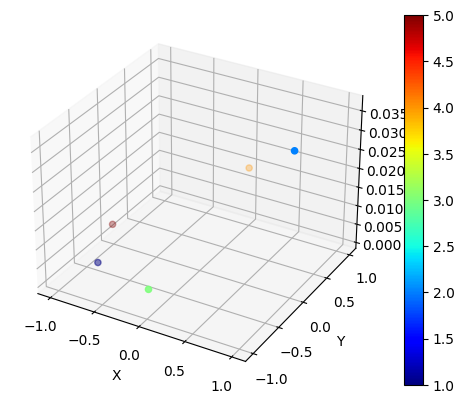

In [5]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Extract the x, y, and z coordinates from the transform column of the DataFrame
x_coords = [row[0] for row in df['[LiDARCalibrationComponent].extrinsic.transform']]
y_coords = [row[1] for row in df['[LiDARCalibrationComponent].extrinsic.transform']]
z_coords = [row[2] for row in df['[LiDARCalibrationComponent].extrinsic.transform']]

# Extract the laser max values from the DataFrame
laser_max = df['key.laser_name']

# Plot the x, y, and z coordinates, color coded by the laser_max values
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_coords, y_coords, z_coords, c=laser_max, cmap=cm.jet)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Add a colorbar to the plot
mappable = cm.ScalarMappable(cmap=cm.jet)
mappable.set_array(laser_max)
plt.colorbar(mappable)

plt.show()

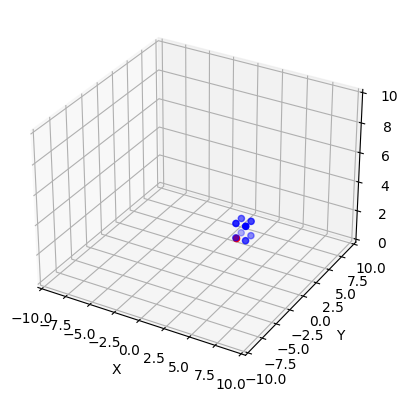

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define points representing the field of view of a lidar sensor
fov = np.array([
    [0, 0, 0],
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1],
    [1, 1, 0],
    [1, 0, 1],
    [0, 1, 1],
    [1, 1, 1],
])

# Define transformation matrix for a lidar sensor
transform = np.array([
    [1, 0, 0, 2],
    [0, 1, 0, 3],
    [0, 0, 1, 1],
    [0, 0, 0, 1],
])

# Transform points from lidar coordinate system to car coordinate system
fov_transformed = np.dot(transform, np.vstack([fov.T, np.ones((1, fov.shape[0]))]))

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot lidar sensor location
ax.scatter(transform[0, 3], transform[1, 3], transform[2, 3], c='r', marker='o')

# Plot transformed points
ax.scatter(fov_transformed[0], fov_transformed[1], fov_transformed[2], c='b', marker='o')

# Set plot limits
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_zlim([0, 10])

# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

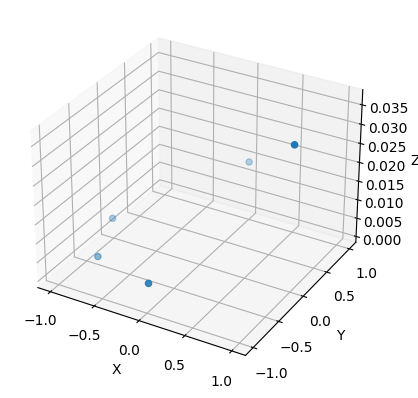

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract the x, y, and z coordinates from the transform column of the DataFrame
x_coords = [row[0] for row in df['[LiDARCalibrationComponent].extrinsic.transform']]
y_coords = [row[1] for row in df['[LiDARCalibrationComponent].extrinsic.transform']]
z_coords = [row[2] for row in df['[LiDARCalibrationComponent].extrinsic.transform']]

# Create a 3D scatter plot of the lidar sensor locations
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_coords, y_coords, z_coords)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()